# 1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In 'heart_disease.xlsx' file, two sheets are given: Description and Heart_disease. In Description sheet, detail of each column of Heart_disease sheet is given. It means, our dataset is stored in Heart_disease sheet.

In [1]:
import pandas as pd    # import pandas lib. using it's short form pd

In [2]:
data = pd.read_excel(r'heart_disease.xlsx', sheet_name= 'Heart_disease', header=0) #load dataset into var. data using python environment (0th row as header)

In [3]:
data.head() #display top 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# 2. Exploratory Data Analysis (EDA)  3. Feature Engineering

Perform exploratory data analysis to understand the structure of the dataset.


In [4]:
data.info() # gives information about null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
data.shape  # no. of rows & columns

(908, 13)

In [6]:
data.isnull().sum()  # there are 62 null values in oldpeak feature

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
data.dtypes  # data type of each column 

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [8]:
data[data.duplicated()]  # print duplicated rows => there is one duplicated row

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [9]:
data = data.drop_duplicates()  # remove duplicated rows 

In [10]:
data[data.duplicated()]  # there is no duplicated row now

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


# Treat Null values of column oldpeak using Imputation technique

Imputation technique is used for replacing the missing data with some substitute values to retain most of the data/information of the dataset. These substitute values can be either mean, median or mode. Here, we can use mean value

In [11]:
mean = data['oldpeak'].mean() # calculate mean of oldpeak column 

In [12]:
mean

0.8923076923076926

In [13]:
data['oldpeak'].fillna(mean,inplace=True) #fill missing values with mean

In [14]:
data.isnull().sum() # we can see no. of null values are 0

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

# inconsistencies in the data 

It includes duplicate or irrelevant observations, incorrect data formatting, or incorrect data, outliers, missing values. We have already removed duplicate observation, treated missing values. Now, let's treat incorrect data formatting (if any) using unique function

In [15]:
data['exang'].unique()  # check unique values

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [16]:
import numpy as np # import numpy lib. using it's short form np 

In [17]:
data = data.replace('FALSE',np.False_) # replace 'FALSE' with False

In [18]:
data = data.replace('TURE',np.True_)  # replace 'TURE' with True

In [19]:
data['exang'].unique()  

array([False,  True])

For checking outliers, we can use boxplot (Boxplot works only on numeric data. So, convert categorical data into numeric using Label Encoding.

# Encode categorical variables

In [20]:
data.columns # shows all columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [21]:
colname =[] # blank list for storing all categorical features in the dataset
for x in data.columns:  # x can be any column 
    if data[x].dtypes=='object':  # compare data type of each column with object
        colname.append(x)  # if above condition satisfied, append that column to the colname list
        
colname   # finally all categorical columns in our dataset will be stored in this list

['sex', 'cp', 'restecg', 'slope', 'thal']

In [22]:
from sklearn.preprocessing import LabelEncoder  # import LabelEncoder function from sublib. preprocessing
le = LabelEncoder()  # save this function in var. le
for x in colname: # x can be any column
    data[x] = le.fit_transform(data[x]) # it will tranform each categorical column into numeric column using LabelEncoder func
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))  # representation in dictionary format 
    print('Feature',x)
    print('mapping', le_name_mapping)

Feature sex
mapping {'Female': 0, 'Male': 1}
Feature cp
mapping {'asymptomatic': 0, 'atypical angina': 1, 'non-anginal': 2, 'typical angina': 3}
Feature restecg
mapping {'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2}
Feature slope
mapping {'downsloping': 0, 'flat': 1, 'upsloping': 2}
Feature thal
mapping {'fixed defect': 0, 'normal': 1, 'reversable defect': 2}


In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0,0


In [24]:
data["fbs"] = data["fbs"].astype(int)  # astype(int) use to convert boolean into 0 and 1
data["exang"] = data["exang"].astype(int)

In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


Note: we will do data scaling just before splitting the data. If we do scaling right now, numerical values in each column will change and we may find difficulty in identifying the outliers 

# Outliers

In [26]:
import matplotlib.pyplot as plt #boxplot function is available in this lib 

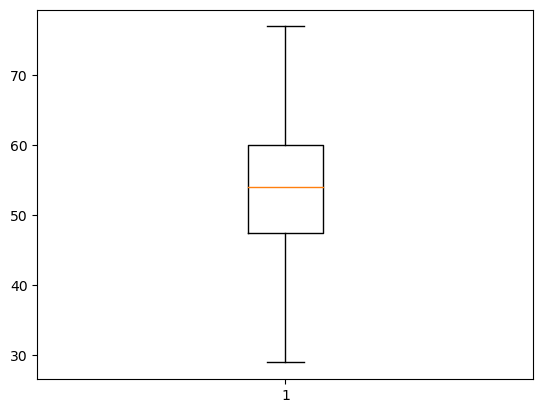

In [27]:
plt.boxplot(data['age']) #plot boxplot for age column
plt.show()

Range of age: 30 to 80. Normally distributed data i.e. no outlier in the data. IQR(Inter Quartile Range) = 60-45 = 15

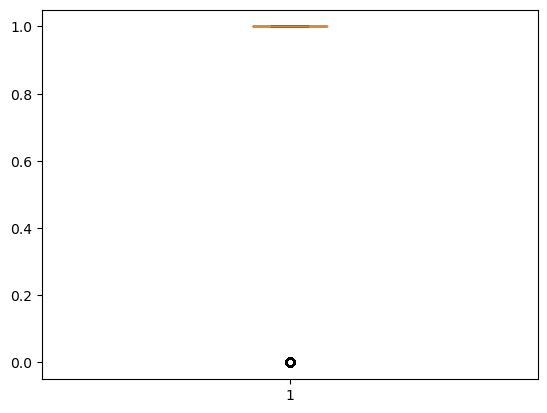

In [28]:
plt.boxplot(data['sex']) 
plt.show()

As per our dataset, sex can be either male or female. That's the reason, we can see only two values either 0.0 or 1.0.  Normally distributed data i.e. no outlier in the data

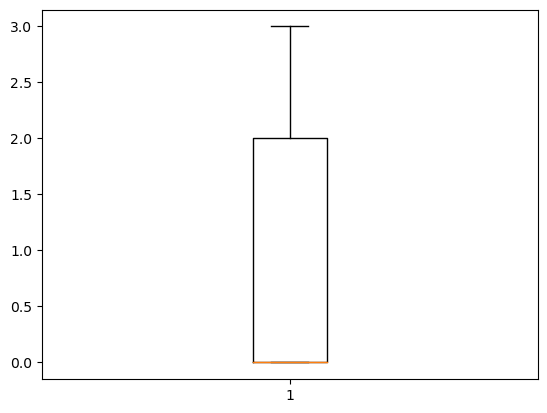

In [29]:
plt.boxplot(data['cp'])
plt.show()

Normally distributed data i.e. no outlier in the data.

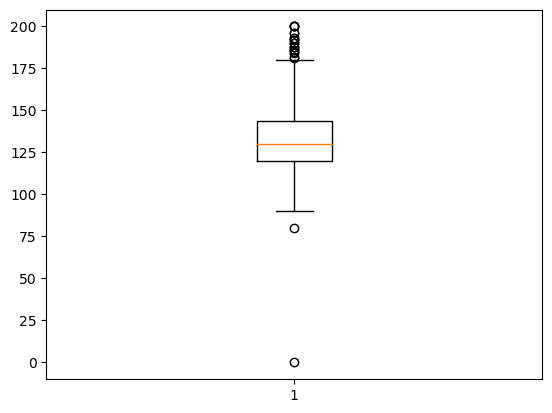

In [30]:
plt.boxplot(data['trestbps'])
plt.show()

Range of trestbps: 0-200. Left skewed data. IQR(Inter Quartile Range) = 150-125 = 25 (approx). Range from 175-200 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There is one outlier at 0 and we can remove it from the dataset

# Treat outlier in column trestbps: only one outlier at 0

In [31]:
data.drop(data[data['trestbps'] < 25].index,axis=0,inplace=True) # remove one outlier below 25

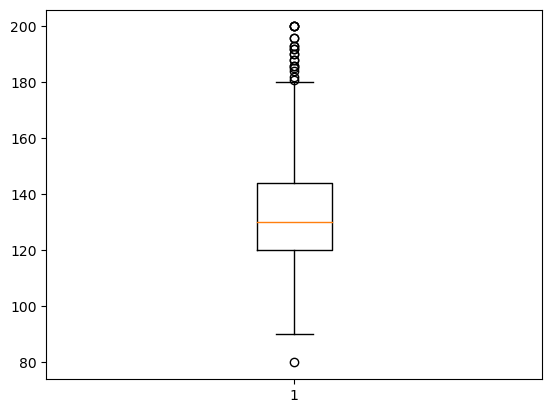

In [32]:
plt.boxplot(data['trestbps']) # one outlier below 25 has been removed now
plt.show()

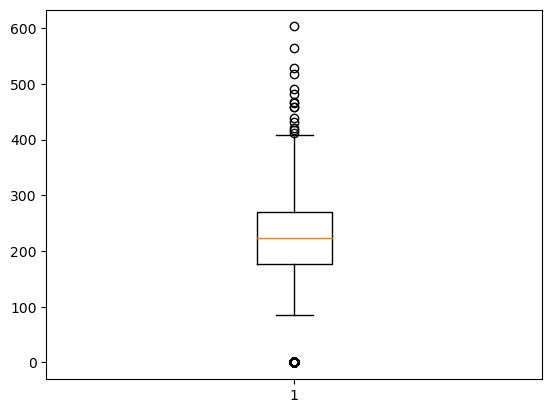

In [33]:
plt.boxplot(data['chol'])
plt.show()

Range of chol: 0-600. Skewness in the data. IQR(Inter Quartile Range) = 275-200 = 75 (approx). Range from 400-500 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset. There is one outlier just above 600 and one outlier at 0, we can remove them from the dataset

# Treat outliers in column chol

In [34]:
data.drop(data[data['chol'] > 600].index,axis=0,inplace=True) # remove one outlier above 600
data.drop(data[data['chol'] < 5].index,axis=0,inplace=True) # remove one outlier below 5

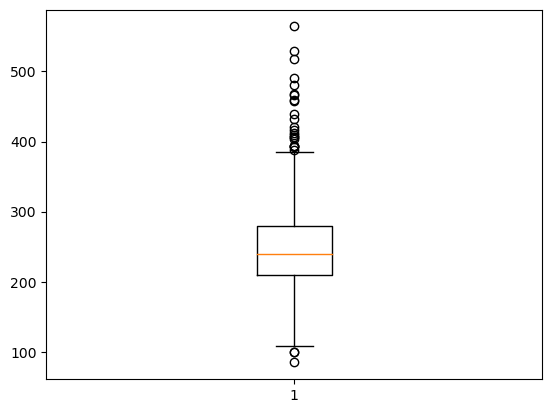

In [35]:
plt.boxplot(data['chol']) # outliers have been removed now
plt.show()

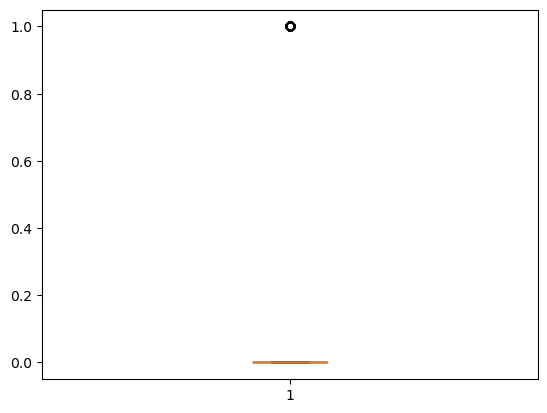

In [36]:
plt.boxplot(data['fbs'])
plt.show()

fbs can be either 0 or 1. So, normally distributed data i.e. no outlier in the data

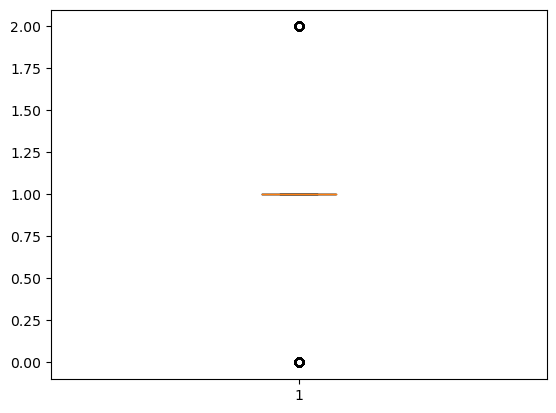

In [37]:
plt.boxplot(data['restecg']) 
plt.show()

As per our dataset, values of restecg can be 0,1 and 2. So, normally distributed data i.e. no outlier in the data

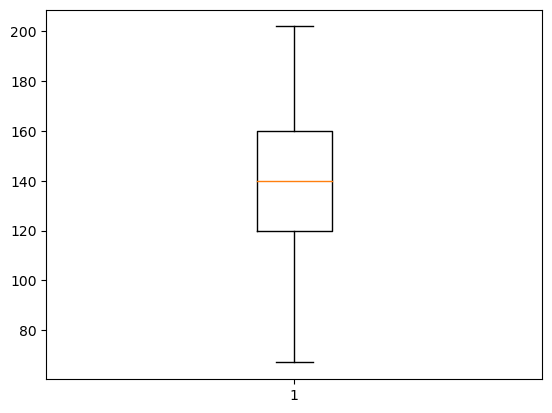

In [38]:
plt.boxplot(data['thalch']) 
plt.show()

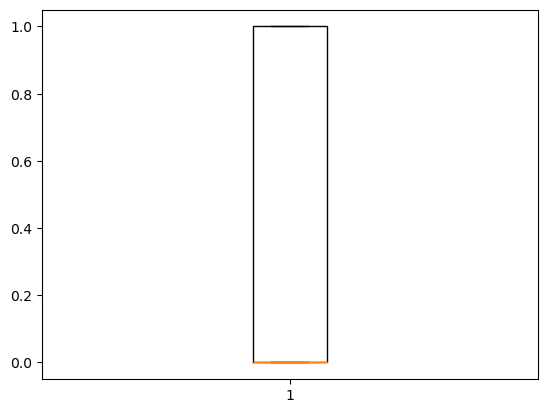

In [39]:
plt.boxplot(data['exang']) 
plt.show()

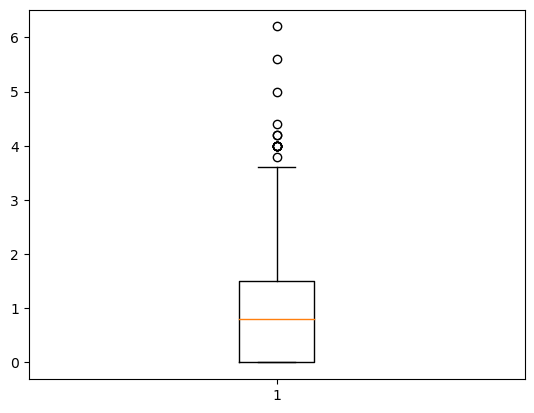

In [40]:
plt.boxplot(data['oldpeak']) 
plt.show()

Range of oldpeak: 0-6. Right skewed data. IQR(Inter Quartile Range) = 1.5-0 = 1.5 (approx). Range from 3.5-4.5 is dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset.  There are outliers above 5 so, we can remove them from the dataset

# Treat outliers in column oldpeak

In [41]:
data.drop(data[data['oldpeak'] > 5].index,axis=0,inplace=True) # remove outliers above 5

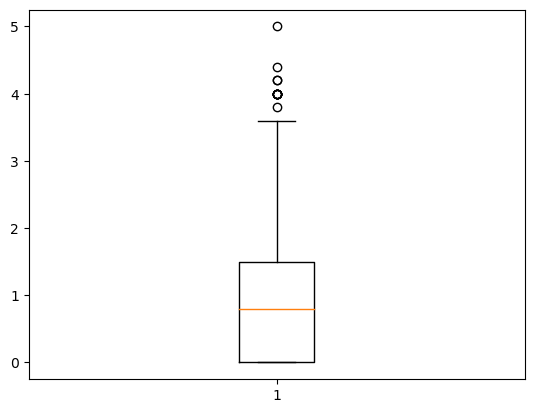

In [42]:
plt.boxplot(data['oldpeak']) #  outliers above 5 have been removed now
plt.show()

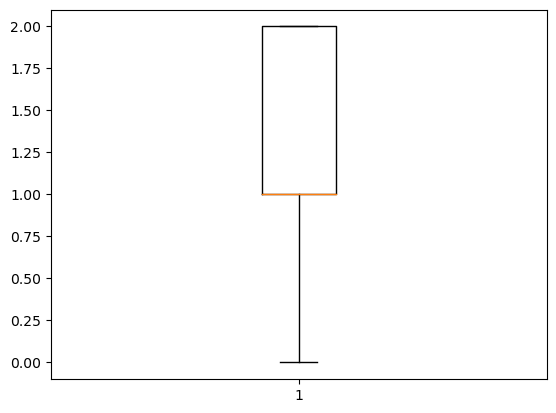

In [43]:
plt.boxplot(data['slope'])
plt.show()

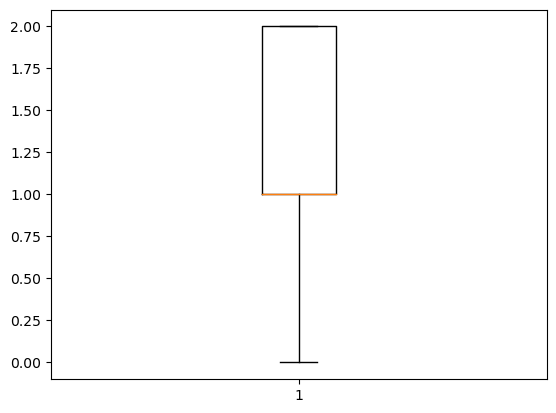

In [44]:
plt.boxplot(data['thal'])
plt.show()

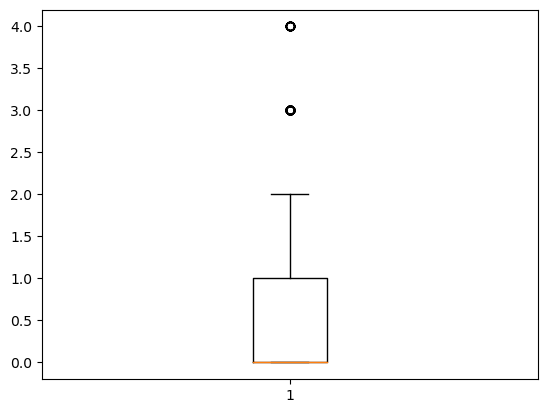

In [45]:
plt.boxplot(data['num'])
plt.show()

Range of num: 0.0 - 4.0.IQR(Inter Quartile Range) = 1.0 - 0.0 = 1.0 (approx). 0=no heart disease; 1,2,3,4 = stages of heart disease  => it means, there is no outlier in our data (normally distributed data)

# Visualize the distribution of features

# histograms

<AxesSubplot:>

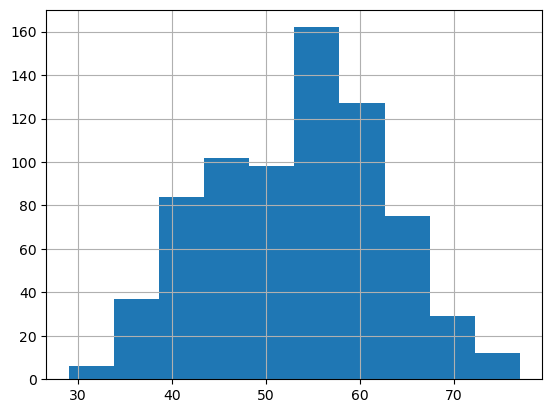

In [46]:
data['age'].hist() #plot histogram for age column

Range of age: 30-80 => normally distributed data i.e. no outlier in the dataset

<AxesSubplot:>

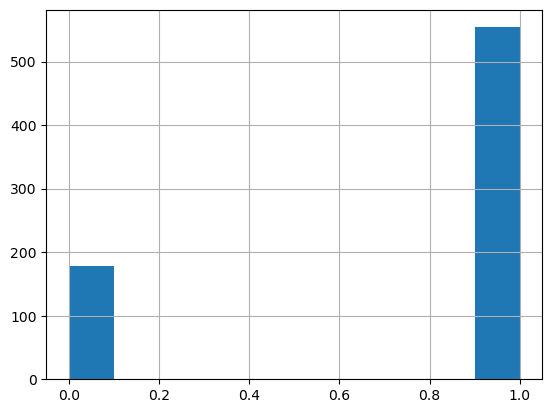

In [47]:
data['sex'].hist()

<AxesSubplot:>

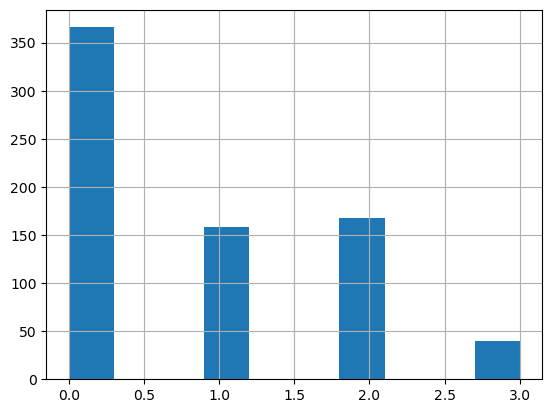

In [48]:
data['cp'].hist()

<AxesSubplot:>

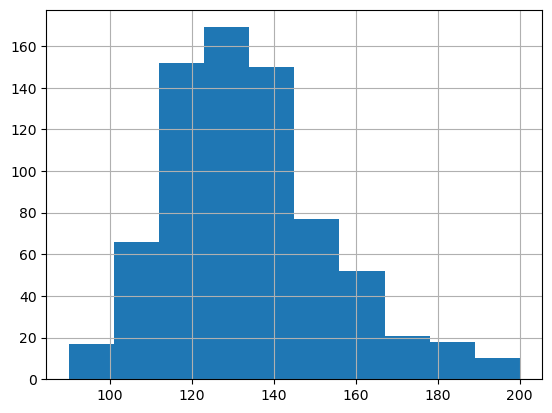

In [49]:
data['trestbps'].hist()

<AxesSubplot:>

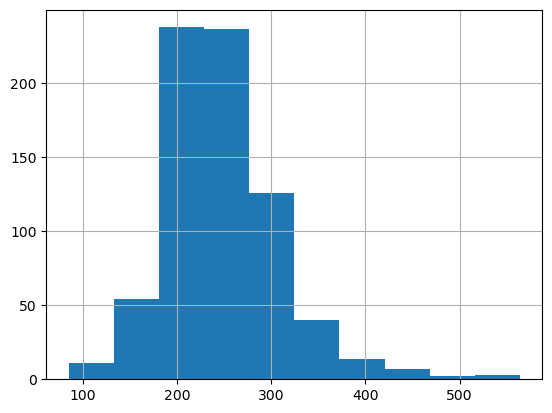

In [50]:
data['chol'].hist()

<AxesSubplot:>

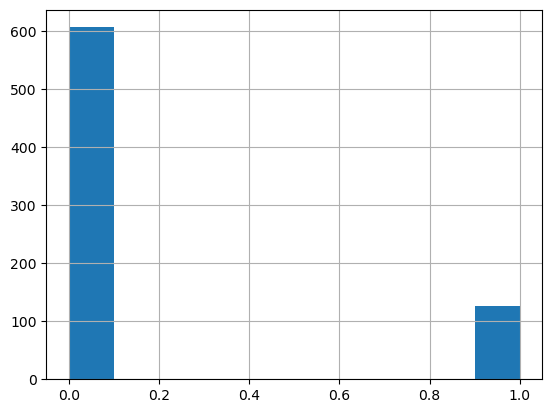

In [51]:
data['fbs'].hist()

<AxesSubplot:>

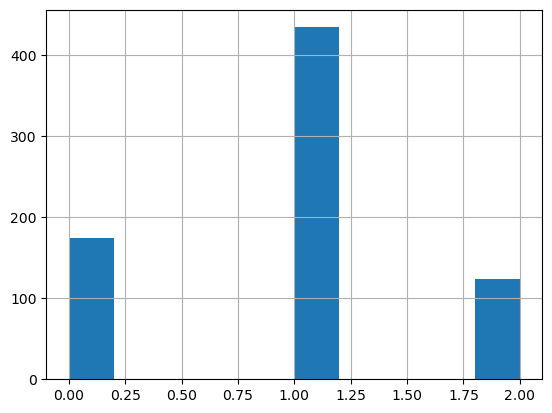

In [52]:
data['restecg'].hist()

<AxesSubplot:>

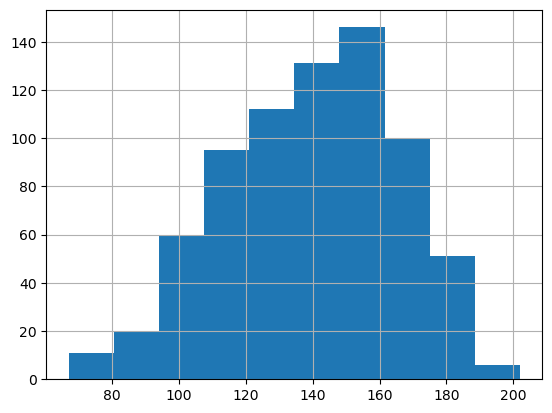

In [53]:
data['thalch'].hist()

<AxesSubplot:>

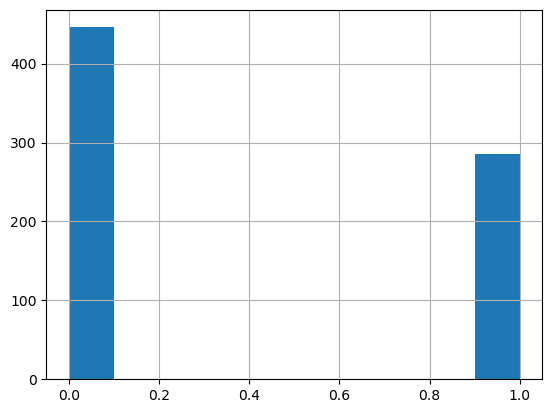

In [54]:
data['exang'].hist()

<AxesSubplot:>

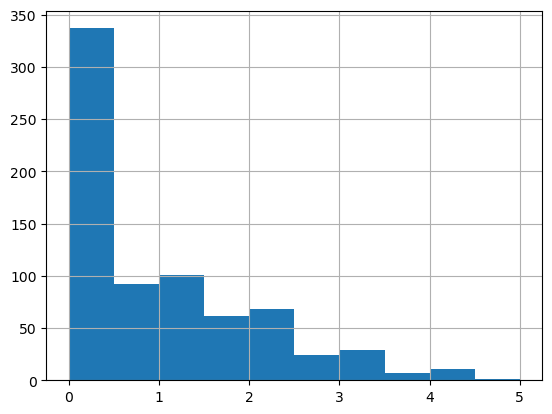

In [55]:
data['oldpeak'].hist()

<AxesSubplot:>

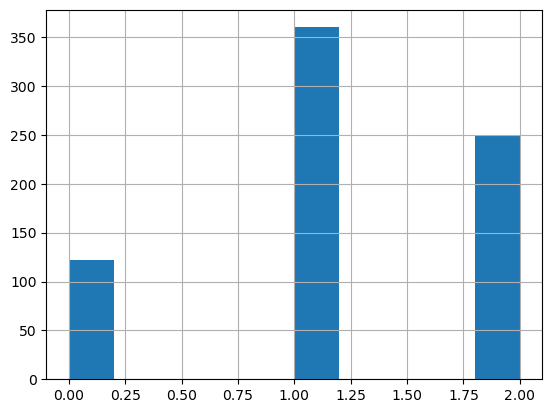

In [56]:
data['slope'].hist()

<AxesSubplot:>

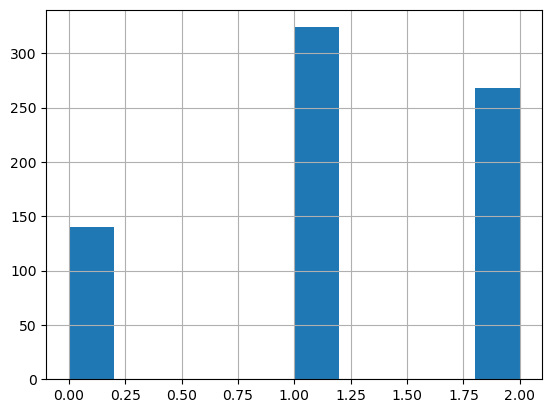

In [57]:
data['thal'].hist()

<AxesSubplot:>

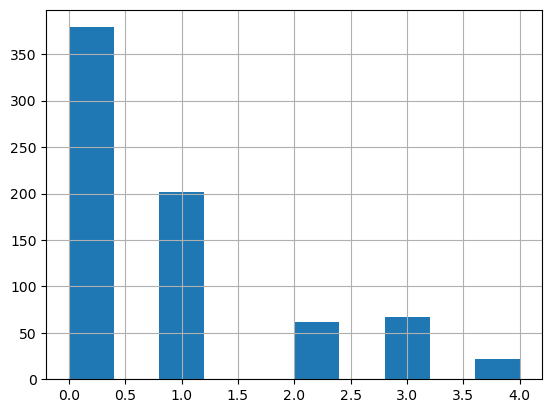

In [58]:
data['num'].hist()

# correlation matrices

Let's apply heatmap over this data to get the value of correlation between two variables

In [59]:
import seaborn as sns

<AxesSubplot:>

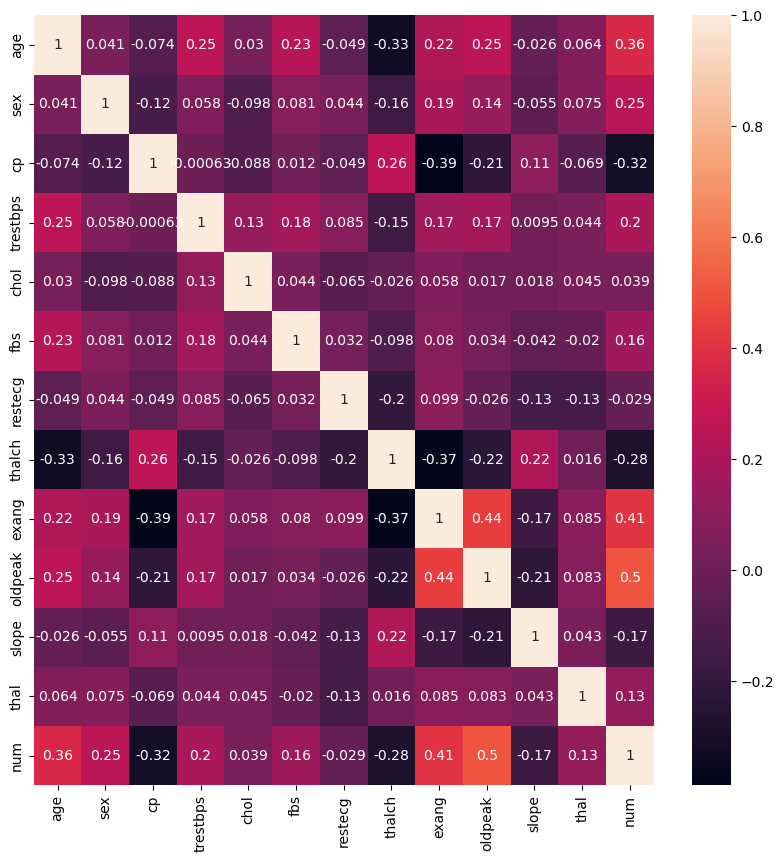

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))  #specify size of heatmap
sns.heatmap(data.corr(),annot=True) #create heatmap (parameter annot is used to display the correlation values, bidefault it is False, so, we have to pass True)

oldpeak is the most contributing element in deciding the target variable num i.e. "ST depression" will decide the stages of heart disease because correlation value between oldpeak and num is 0.5 which is maximum value shown in this heatmap. Also, they have positive correlation (both variable varies in the same direction)

# 4. Decision Tree Classification:



In [61]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [62]:
data.shape

(732, 13)

In [63]:
X = data.iloc[:,0:-1]  # define X and Y
Y = data.iloc[:,-1]   # target var. num

In [64]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.300000,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
900,61,1,0,190,287,1,0,150,1,2.000000,0,2
902,62,1,0,160,254,1,2,108,1,3.000000,1,1
904,62,1,0,166,170,0,2,120,1,3.000000,1,2
906,56,1,2,144,208,1,2,105,1,0.892308,0,0


# scaling numerical features

Scaling is needed because our model can show biasness towards those columns having higher numerical values

In [65]:
from sklearn.preprocessing import StandardScaler # import StandardScaler function
scaler = StandardScaler() # save this func into var. scaler
scaler.fit(X)  # apply StandardScaler on X
X = scaler.transform(X) # StandardScaler function transform the values of X in predefined range of -3 to +3 

In [66]:
X

array([[ 1.06504890e+00,  5.66832990e-01,  2.25064026e+00, ...,
         1.36404018e+00, -1.69998989e+00, -1.61869323e+00],
       [-1.32541068e+00,  5.66832990e-01,  1.67873294e-01, ...,
        -8.67819772e-01, -2.53021751e-01, -1.61869323e+00],
       [ 4.13105379e-01,  5.66832990e-01, -8.73510191e-01, ...,
        -4.79670214e-01, -2.53021751e-01, -1.61869323e+00],
       ...,
       [ 9.56391648e-01,  5.66832990e-01, -8.73510191e-01, ...,
         2.04330191e+00, -2.53021751e-01,  1.13684967e+00],
       [ 3.04448125e-01,  5.66832990e-01,  1.20925678e+00, ...,
        -1.94768194e-03, -1.69998989e+00, -1.61869323e+00],
       [ 4.13105379e-01,  5.66832990e-01, -8.73510191e-01, ...,
        -1.94768194e-03, -2.53021751e-01,  1.13684967e+00]])

In [67]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
900    4
902    4
904    4
906    4
907    4
Name: num, Length: 732, dtype: int64

In [68]:
print(X.shape)
print(Y.shape)

(732, 12)
(732,)


In [69]:
from sklearn.model_selection import train_test_split # import train_test_split function 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40) #Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [70]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(585, 12)
(147, 12)
(585,)
(147,)


Decision tree chooses the best attribute in the dataset using ASM (Attribute Selection Measure) in deciding the class of target variable num where ASM use either information gain or entropy.

Information gain returns a value which calculate how important a column is in deciding the class of target variable whereas entropy measures the impurity in the data i.e. how much the column is irrelevant in deciding the class of target variable. 

In [71]:
from sklearn.tree import DecisionTreeClassifier  # import DecisionTreeClassifier function/algorithm
model = DecisionTreeClassifier(criterion='entropy')  #ASM using entropy for deciding target var.
model.fit(X_train,Y_train)  # model training


DecisionTreeClassifier(criterion='entropy')

In [72]:
Y_pred = model.predict(X_test)  # predict the class of Y for the given testing data

In [73]:
Y_pred

array([0, 1, 0, 1, 0, 4, 3, 2, 0, 1, 0, 3, 3, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 4, 0, 0, 0, 1, 1, 0, 0, 1, 4, 2, 0, 0, 1, 3, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       3, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 4, 0,
       1, 1, 3, 3, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 4, 0, 3, 0,
       0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0], dtype=int64)

In [74]:
print(list(zip(Y_test,Y_pred))) # compare actual class of Y with the predicted class of Y 

[(0, 0), (1, 1), (1, 0), (1, 1), (0, 0), (0, 4), (4, 3), (0, 2), (0, 0), (1, 1), (0, 0), (0, 3), (3, 3), (0, 0), (0, 1), (3, 1), (0, 0), (3, 1), (3, 0), (3, 1), (3, 1), (0, 0), (3, 1), (1, 0), (3, 4), (1, 0), (0, 0), (0, 0), (2, 1), (1, 1), (0, 0), (0, 0), (1, 1), (3, 4), (1, 2), (0, 0), (1, 0), (1, 1), (0, 3), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 2), (0, 0), (3, 1), (0, 1), (1, 1), (0, 0), (3, 1), (0, 1), (0, 0), (1, 1), (2, 1), (0, 0), (1, 0), (0, 0), (3, 3), (1, 0), (3, 1), (3, 3), (0, 0), (0, 0), (4, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 3), (1, 0), (3, 1), (0, 0), (0, 0), (0, 0), (1, 4), (0, 0), (4, 1), (1, 1), (1, 3), (0, 3), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 3), (0, 0), (0, 0), (1, 0), (0, 0), (3, 1), (0, 0), (0, 1), (1, 0), (2, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 4), (1, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (2, 1),

# evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score).

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[59 13  1  3  1]
 [18 18  4  3  2]
 [ 1  3  0  0  1]
 [ 1 10  0  3  2]
 [ 0  2  0  2  0]]
classification report
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        77
           1       0.39      0.40      0.40        45
           2       0.00      0.00      0.00         5
           3       0.27      0.19      0.22        16
           4       0.00      0.00      0.00         4

    accuracy                           0.54       147
   macro avg       0.28      0.27      0.27       147
weighted avg       0.54      0.54      0.54       147

accuracy of the model: 0.54421768707483


Confusion matrix is a matrix which represents the summary of the prediction results on a classification problem.

Precision means percentage of True positive predictions among all positive predictions made by the model. It is calculated as the ratio of TP to the sum of TP and false positives (FP).

F1 Score is a metric that balances precision and recall. It is calculated as the mean of precision and recall.

recall is the accuracy of individual class.

Inference: accuracy of Class 0 is 81% whereas accuracy of class 1 is just 42%. In our dataset, there are 399 enteries for class 0 and 265 entries for class 1 which means the amount of training data is much more in class 0 as compared to class 1. Hence, our model tend to get bias towards class 0 due to more amount of training data. That's why, performance of our model on class 0 is much better than class 1.

Model performed poorly for class 3 with accuracy of just 19% and worst performance for class 2 & class 4 with 0% accuracy. 

Overall accuracy of the model is 57%

In [76]:
model.score(X_train,Y_train) # score of the model while training the data

1.0

score is 100% which means  our decision tree model overfits itself to a training data

In [77]:
print(list(zip(data.columns[0:-1], model.feature_importances_))) # score of all input features 

[('age', 0.1498556031290681), ('sex', 0.02313295818162926), ('cp', 0.1344298391885084), ('trestbps', 0.09836471145374781), ('chol', 0.15818294208522435), ('fbs', 0.02145389023749068), ('restecg', 0.04535222958407345), ('thalch', 0.10807587004042628), ('exang', 0.035043377584241656), ('oldpeak', 0.16630864030695786), ('slope', 0.032336885124049086), ('thal', 0.027463053084583206)]


oldpeak is the most important features in deciding the class of Y

Since, accuracy of the model is 57%, so, let's check our classification model worked on balanced dataset or not

In [78]:
from collections import Counter
counter = Counter(data['num'])

In [79]:
counter

Counter({0: 379, 1: 202, 2: 62, 3: 67, 4: 22})

our classification model worked on imbalanced dataset. So, let's balance the dataset using oversampling. In oversampling, no. of samples added to minority class until minority & majority class have equal distribution of data -> again train the model

In [80]:
X = data.iloc[:,0:-1]  # define X and Y
Y = data.iloc[:,-1]   # target var. num

In [81]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.300000,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
900,61,1,0,190,287,1,0,150,1,2.000000,0,2
902,62,1,0,160,254,1,2,108,1,3.000000,1,1
904,62,1,0,166,170,0,2,120,1,3.000000,1,2
906,56,1,2,144,208,1,2,105,1,0.892308,0,0


In [82]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
900    4
902    4
904    4
906    4
907    4
Name: num, Length: 732, dtype: int64

In [83]:
print(X.shape)
print(Y.shape)

(732, 12)
(732,)


In [84]:
from imblearn.over_sampling import SMOTE  # import SMOTE func from sublib over_sampling
smote = SMOTE()                    # save func in smote var.
X, Y = smote.fit_resample(X, Y)   # it will add synthetic data points to minority class

In [85]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.300000,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1890,53,0,0,150,238,0,0,124,0,2.237838,1,2
1891,61,1,0,124,239,0,0,151,0,3.289356,0,2
1892,61,1,0,134,207,0,0,132,0,2.290152,1,1
1893,57,0,1,145,211,0,1,106,0,0.911421,0,0


In [86]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1890    4
1891    4
1892    4
1893    4
1894    4
Name: num, Length: 1895, dtype: int64

In [87]:
print(X.shape)     # 1163 rows are added 
print(Y.shape)

(1895, 12)
(1895,)


In [88]:
counter = Counter(Y)

In [89]:
counter   # equal distribution of data 

Counter({0: 379, 1: 379, 2: 379, 3: 379, 4: 379})

In [90]:
from sklearn.preprocessing import StandardScaler # import StandardScaler function
scaler = StandardScaler() # save this func into var. scaler
scaler.fit(X)  # apply StandardScaler on X
X = scaler.transform(X) # StandardScaler function transform the values of X in predefined range of -3 to +3 

In [91]:
X

array([[ 0.78892734,  0.49504775,  3.31742867, ...,  0.7990298 ,
        -1.37118568, -1.46986911],
       [-1.79882883,  0.49504775,  0.72611485, ..., -1.29260083,
         0.18941304, -1.46986911],
       [ 0.08317566,  0.49504775, -0.56954206, ..., -0.92883898,
         0.18941304, -1.46986911],
       ...,
       [ 0.55367678,  0.49504775, -0.56954206, ...,  0.79007357,
         0.18941304, -0.09163954],
       [ 0.08317566, -2.02000717,  0.72611485, ..., -0.46375   ,
        -1.37118568, -1.46986911],
       [-0.03444962,  0.49504775, -0.56954206, ...,  1.47454495,
        -1.37118568, -1.46986911]])

In [92]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40) # training and testing data (model can randomly take 10 rows at a time)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1516, 12)
(379, 12)
(1516,)
(379,)


In [94]:
from sklearn.tree import DecisionTreeClassifier  # import DecisionTreeClassifier function/algorithm
model_tree = DecisionTreeClassifier(criterion='entropy')  #ASM using entropy for deciding target var.
model_tree.fit(X_train,Y_train)  # model training


DecisionTreeClassifier(criterion='entropy')

In [95]:
Y_pred = model_tree.predict(X_test) # predict the class of Y for the given testing data

In [96]:
Y_pred 

array([2, 1, 1, 1, 3, 1, 3, 2, 2, 4, 4, 2, 0, 4, 4, 2, 1, 2, 2, 0, 3, 1,
       4, 3, 2, 0, 0, 4, 3, 2, 1, 4, 3, 1, 2, 4, 2, 1, 3, 3, 4, 1, 1, 3,
       1, 3, 3, 0, 3, 3, 2, 4, 2, 3, 4, 2, 4, 3, 3, 3, 3, 2, 1, 4, 2, 0,
       4, 2, 3, 0, 2, 2, 0, 4, 1, 0, 3, 4, 4, 4, 4, 0, 4, 3, 3, 1, 4, 2,
       4, 3, 2, 4, 3, 1, 3, 2, 2, 1, 0, 1, 2, 0, 2, 1, 4, 2, 2, 1, 1, 4,
       2, 2, 1, 3, 2, 2, 4, 3, 4, 3, 2, 3, 2, 4, 1, 2, 0, 2, 1, 0, 2, 4,
       0, 3, 3, 2, 1, 0, 3, 1, 4, 4, 3, 3, 3, 0, 0, 3, 4, 3, 0, 1, 3, 2,
       1, 2, 2, 3, 3, 3, 4, 0, 3, 2, 4, 0, 0, 2, 4, 0, 4, 3, 1, 3, 4, 1,
       1, 0, 1, 2, 4, 0, 2, 0, 1, 3, 1, 0, 1, 3, 3, 4, 2, 3, 1, 2, 3, 1,
       2, 2, 4, 4, 1, 1, 3, 4, 3, 0, 3, 2, 0, 2, 2, 0, 3, 3, 2, 0, 1, 2,
       1, 3, 0, 2, 0, 2, 4, 0, 4, 3, 4, 3, 1, 4, 1, 1, 2, 0, 2, 2, 4, 2,
       4, 1, 3, 0, 1, 2, 2, 3, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       3, 0, 3, 0, 0, 2, 3, 4, 4, 3, 1, 4, 4, 3, 4, 4, 3, 3, 1, 3, 0, 2,
       0, 1, 1, 3, 3, 3, 2, 4, 4, 0, 0, 0, 1, 0, 3,

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[41 12  3  7  0]
 [15 40 11  6  3]
 [ 1 12 69  5  7]
 [ 2  7  7 64  3]
 [ 0  1  3  2 58]]
classification report
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        63
           1       0.56      0.53      0.54        75
           2       0.74      0.73      0.74        94
           3       0.76      0.77      0.77        83
           4       0.82      0.91      0.86        64

    accuracy                           0.72       379
   macro avg       0.71      0.72      0.72       379
weighted avg       0.71      0.72      0.72       379

accuracy of the model: 0.7176781002638523


Accuracy of the model has improved from 52% to 72%

# Evaluate the performance of the model on the testing data using ROC-AUC score. Visualize the ROC curve.

In [98]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1890    4
1891    4
1892    4
1893    4
1894    4
Name: num, Length: 1895, dtype: int64

In [99]:
Y.shape

(1895,)

First we need to use binarization on target variable (binarization is a preprocessing step which convert data into binary form)

In [100]:
from sklearn.preprocessing import label_binarize
Y = label_binarize(Y, classes= [0,1,2,3,4])

In [101]:
Y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [102]:
from sklearn.model_selection import train_test_split # import train_test_split function 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40) #Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [103]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1516, 12)
(379, 12)
(1516, 5)
(379, 5)


In [104]:
X_train

array([[ 0.08317566,  0.49504775, -0.56954206, ..., -0.19106124,
        -1.37118568,  1.28659003],
       [-0.85782658,  0.49504775, -0.56954206, ...,  1.30220246,
         0.18941304,  1.28659003],
       [ 1.37705375,  0.49504775, -0.56954206, ..., -0.97909199,
        -1.37118568, -0.09163954],
       ...,
       [-0.97545186,  0.49504775,  2.02177176, ..., -1.29260083,
        -1.37118568, -1.46986911],
       [-0.97545186, -2.02000717,  0.72611485, ...,  0.52620841,
         1.75001175,  1.28659003],
       [ 1.37705375,  0.49504775, -0.56954206, ..., -0.37850396,
         0.18941304, -1.46986911]])

In [105]:
X_test

array([[ 0.78892734,  0.49504775, -0.56954206, ..., -0.05612404,
         0.18941304, -0.09163954],
       [-0.38732546,  0.49504775, -0.56954206, ..., -0.02407683,
         0.18941304, -1.46986911],
       [-1.32832771,  0.49504775, -0.56954206, ...,  0.48108803,
         0.18941304,  1.28659003],
       ...,
       [-1.32832771, -2.02000717, -0.56954206, ..., -1.1107199 ,
         0.18941304, -0.09163954],
       [ 0.08317566,  0.49504775,  2.02177176, ..., -0.07919908,
        -1.37118568, -0.09163954],
       [ 1.72992959,  0.49504775, -0.56954206, ..., -0.14994714,
         0.18941304, -1.46986911]])

In [106]:
Y_train

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [107]:
Y_test

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

# Computing AUC Score

Now let’s calculate the AUC score for the predictions made using the one v/s all method i.e. OneVsRestClassifier. 
OneVsRestClassifier is a method that uses classification algorithm for multi-class classifications. 

In [108]:
from sklearn.multiclass import OneVsRestClassifier 
model = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train, Y_train)

In [109]:
model

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [110]:
Y_pred_proba = model.predict_proba(X_test)  # returns the predicted probabilities for each class

In [111]:
Y_pred_proba

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In ROC curve, we have FPR(False Positive Rate) on x-axis and TPR(True Positive Rate) on Y-axis. The threshold value minimise the difference between TPR and FPR . 

In [112]:
fpr = [0]   # define initial value of fpr as 0
tpr = [0] 
thresholds = [0]
auc_score = [0]  # define initial value of accuracy score as 0

Since, there are 5 classes, so, we need 5 values 

In [113]:
fpr = [0] * 5
tpr = [0] * 5
thresholds = [0] * 5
auc_score = [0] * 5

In [114]:
fpr

[0, 0, 0, 0, 0]

In [115]:
tpr

[0, 0, 0, 0, 0]

In [116]:
thresholds

[0, 0, 0, 0, 0]

In [117]:
auc_score

[0, 0, 0, 0, 0]

In [118]:
n_classes = 5 # no. of classes

In [119]:
from sklearn.metrics import roc_curve, auc  # import roc_curve, auc 

for i in range(n_classes):  # i = 0 to 4
    fpr[i], tpr[i], thresholds[i] = roc_curve(Y_test[:, i], Y_pred_proba[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

[0.7573086196503919,
 0.7091008771929824,
 0.8530981709593131,
 0.8199487137740149,
 0.9216269841269841]

AUC score of the model with class 0 as positive class = 0.72

AUC score of the model with class 1 as positive class =  0.70

AUC score of the model with class 2 as positive class = 0.79

AUC score of the model with class 3 as positive class = 0.78

AUC score of the model with class 4 as positive class = 0.92

In [120]:
sum(auc_score) / n_classes  # average which gives accuracy = 78.6% 

0.8122166731407374

# Visualizing ROC Curve

Now by using the predictions for the five classes we will try to visualise the roc curve for each of the classes

In [121]:
n_classes

5

In [122]:
class_names= [0,1,2,3,4]

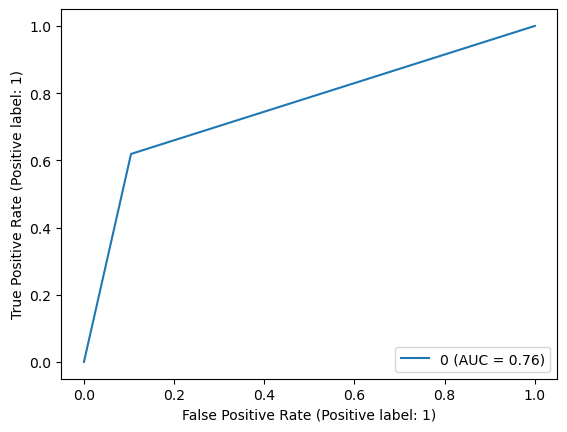

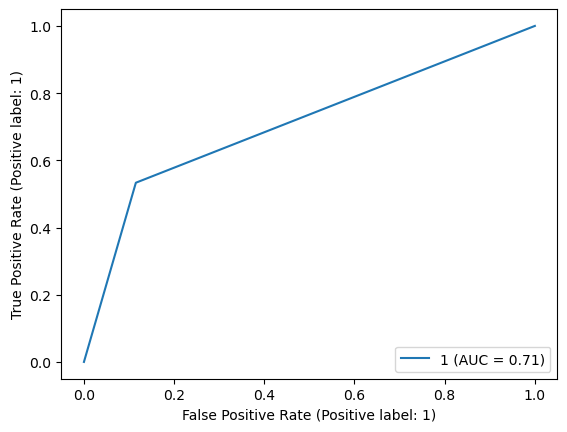

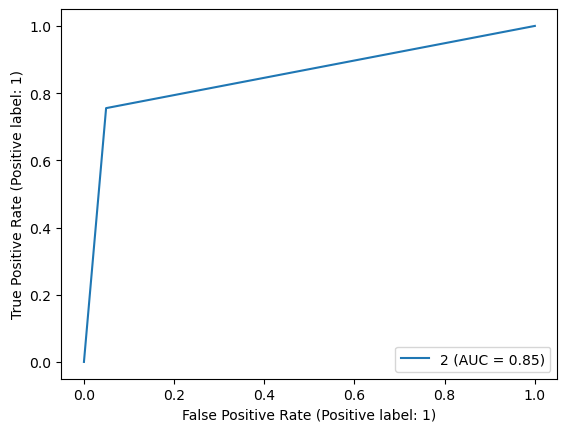

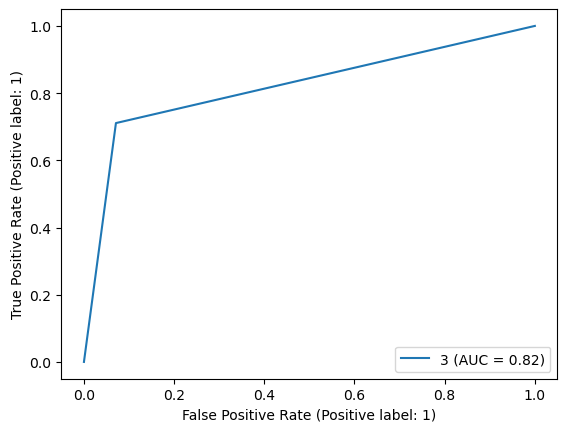

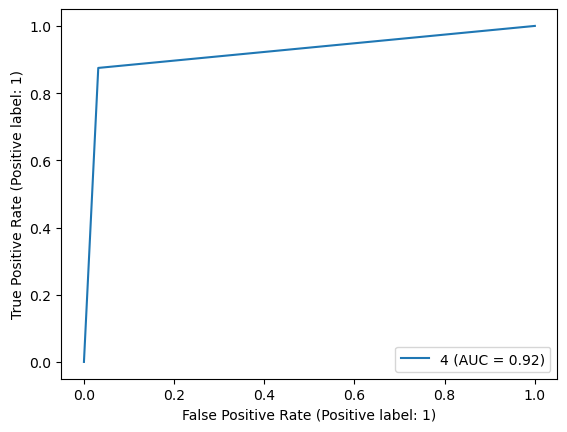

In [123]:
from sklearn.metrics import RocCurveDisplay  # import RocCurveDisplay function
for i in range(n_classes):  # i = 0,1,2,3,4
    RocCurveDisplay.from_predictions(Y_test[:, i], Y_pred_proba[:, i], name= class_names[i])

we can also plot multiple graphs with different colors on the same figure 

In [124]:
from itertools import cycle
colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "black"])

In [125]:
colors

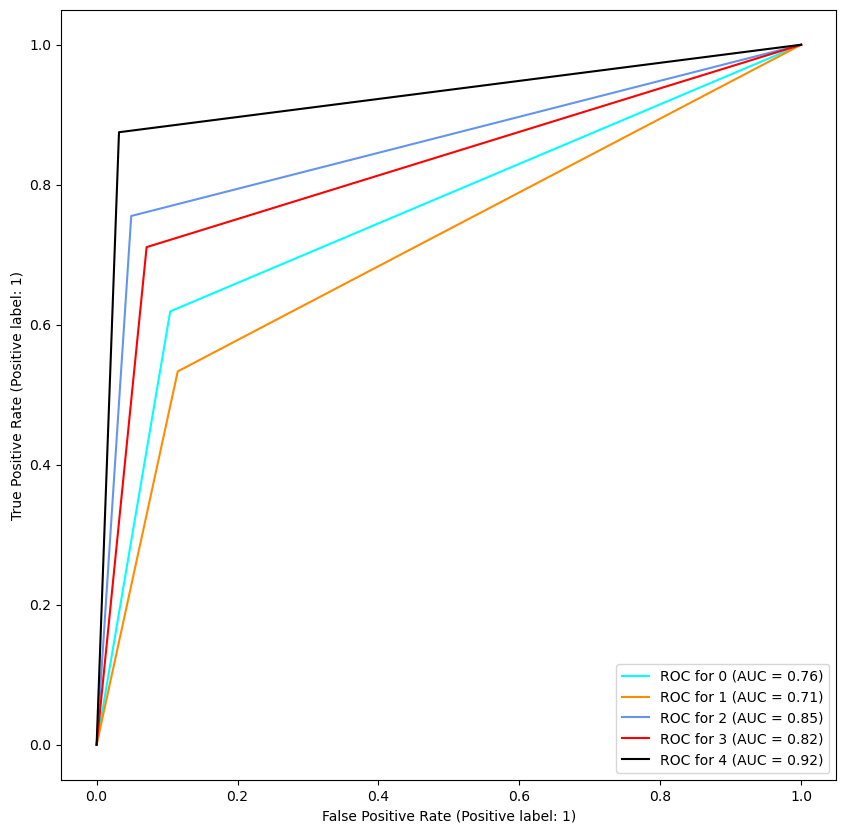

In [126]:
fig, ax = plt.subplots(figsize=(10, 10))

for i, j in zip(range(n_classes), colors):  # i = 0 to 4, j refers to list of colors given to cycle func
      RocCurveDisplay.from_predictions(Y_test[:, i], Y_pred_proba[:, i],name= f"ROC for {class_names[i]}", color = j, ax= ax)

Inference: ROC curve gives visual understanding of model accuracy. The closer to a right angle the curve, the more accurate the model. Therefore, Model for class 4 is the most accurate. 

# 5. Hyperparameter Tuning:

the performance of decision trees highly relies on the hyperparameters, selecting the optimal hyperparameter can significantly impact the model’s accuracy. 

Types of Hyperparameters in Decision Tree: Criteria, max_depth, min_samples_split

Criteria: Gini, entropy

max_depth: controls length of the tree. If length of the tree increases leads to overfitting, so, to avoid overfitting, we choose the value of max_depth in such a way to reduce the risk of overfitting

min_samples_split: it is the minimum no. of samples needed to split a node. If no. of samples in a node < min_samples_split , then the node will not split and hence become a leaf node

In [127]:
X = data.iloc[:,0:-1]  # define X and Y
Y = data.iloc[:,-1]   # target var. num

In [128]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.300000,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
900,61,1,0,190,287,1,0,150,1,2.000000,0,2
902,62,1,0,160,254,1,2,108,1,3.000000,1,1
904,62,1,0,166,170,0,2,120,1,3.000000,1,2
906,56,1,2,144,208,1,2,105,1,0.892308,0,0


In [129]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
900    4
902    4
904    4
906    4
907    4
Name: num, Length: 732, dtype: int64

In [130]:
print(X.shape)
print(Y.shape)

(732, 12)
(732,)


In [131]:
from imblearn.over_sampling import SMOTE  # import SMOTE func from sublib over_sampling
smote = SMOTE()                    # save func in smote var.
X, Y = smote.fit_resample(X, Y)   # it will add synthetic data points to minority class

In [132]:
print(X.shape)     # 1163 rows are added 
print(Y.shape)

(1895, 12)
(1895,)


In [133]:
counter = Counter(Y)

In [134]:
counter   # equal distribution of data 

Counter({0: 379, 1: 379, 2: 379, 3: 379, 4: 379})

In [135]:
from sklearn.preprocessing import StandardScaler # import StandardScaler function
scaler = StandardScaler() # save this func into var. scaler
scaler.fit(X)  # apply StandardScaler on X
X = scaler.transform(X) # StandardScaler function transform the values of X in predefined range of -3 to +3 

In [136]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40) # training and testing data (model can randomly take 10 rows at a time)

In [137]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1516, 12)
(379, 12)
(1516,)
(379,)


In [138]:
from sklearn.tree import DecisionTreeClassifier  # import DecisionTreeClassifier function/algorithm
dtree_classifier = DecisionTreeClassifier(criterion='entropy')  #ASM using entropy for deciding target var.

In [139]:
dtree_classifier

DecisionTreeClassifier(criterion='entropy')

In [140]:
import numpy as np
hyper_params = {'max_depth': np.random.randint(1,50,10),'min_samples_split': np.random.randint(2,50,10)} # define hyperparameters

In [141]:
hyper_params  # dictionary type

{'max_depth': array([36, 12, 35, 47, 17,  3, 25, 25,  5, 46]),
 'min_samples_split': array([45, 36,  4, 47, 10, 13, 22, 10,  9, 38])}

RandomizedSearchCV is a method for hyper parameter tuning in decision tree. This method uses Decision tree algorithm for training the model as well as for predicting the class of Y 

In [142]:
from sklearn.model_selection import RandomizedSearchCV  # one of the methods for hyperparameter tuning in decision tree
random_search = RandomizedSearchCV(estimator= dtree_classifier, param_distributions= hyper_params, n_iter= 100, cv= 5, random_state=40)

In [143]:
random_search

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=100,
                   param_distributions={'max_depth': array([36, 12, 35, 47, 17,  3, 25, 25,  5, 46]),
                                        'min_samples_split': array([45, 36,  4, 47, 10, 13, 22, 10,  9, 38])},
                   random_state=40)

In [144]:
random_search.fit(X_train, Y_train) # model training 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=100,
                   param_distributions={'max_depth': array([36, 12, 35, 47, 17,  3, 25, 25,  5, 46]),
                                        'min_samples_split': array([45, 36,  4, 47, 10, 13, 22, 10,  9, 38])},
                   random_state=40)

In [145]:
best_params = random_search.best_params_  # best combinations of hyper parameters

In [146]:
best_params

{'min_samples_split': 4, 'max_depth': 17}

In [147]:
Y_pred = random_search.predict(X_test)  # predict the class of Y 

In [148]:
Y_pred

array([2, 0, 2, 2, 1, 3, 1, 1, 1, 4, 4, 3, 0, 4, 4, 2, 0, 3, 1, 1, 3, 1,
       4, 1, 4, 0, 0, 4, 3, 2, 4, 4, 1, 1, 2, 4, 2, 0, 0, 1, 4, 1, 1, 3,
       2, 1, 1, 4, 3, 1, 1, 0, 3, 3, 4, 2, 4, 0, 3, 3, 4, 2, 3, 4, 2, 0,
       2, 2, 3, 1, 3, 2, 0, 4, 3, 0, 0, 4, 4, 1, 2, 2, 2, 3, 3, 1, 4, 2,
       4, 1, 3, 4, 2, 1, 3, 2, 1, 1, 0, 0, 2, 0, 2, 0, 4, 2, 4, 3, 2, 1,
       3, 2, 1, 3, 1, 2, 4, 3, 4, 3, 3, 3, 2, 4, 4, 2, 0, 2, 1, 1, 3, 4,
       0, 3, 1, 1, 1, 1, 1, 1, 4, 1, 3, 3, 3, 0, 0, 3, 4, 2, 0, 1, 1, 1,
       3, 3, 2, 2, 3, 1, 4, 2, 2, 2, 1, 3, 1, 2, 4, 0, 4, 3, 0, 2, 4, 2,
       1, 0, 1, 1, 4, 0, 2, 0, 1, 0, 1, 0, 1, 3, 3, 4, 2, 4, 1, 2, 3, 1,
       2, 0, 3, 2, 0, 2, 3, 3, 1, 0, 3, 2, 0, 2, 2, 0, 3, 2, 2, 0, 2, 2,
       1, 3, 0, 1, 0, 2, 3, 1, 4, 3, 4, 2, 1, 1, 0, 1, 2, 1, 1, 2, 4, 2,
       1, 1, 1, 1, 1, 2, 2, 3, 0, 1, 3, 0, 1, 4, 3, 2, 3, 2, 4, 0, 3, 2,
       3, 0, 1, 2, 1, 0, 4, 4, 4, 2, 0, 4, 4, 3, 1, 4, 3, 3, 2, 2, 1, 2,
       1, 1, 2, 3, 1, 3, 2, 3, 4, 1, 1, 0, 3, 3, 3,

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[35 20  4  3  1]
 [15 45  4 11  0]
 [ 7 12 69  4  2]
 [ 2 12  8 57  4]
 [ 0  4  2  4 54]]
classification report
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        63
           1       0.48      0.60      0.54        75
           2       0.79      0.73      0.76        94
           3       0.72      0.69      0.70        83
           4       0.89      0.84      0.86        64

    accuracy                           0.69       379
   macro avg       0.70      0.68      0.69       379
weighted avg       0.70      0.69      0.69       379

accuracy of the model: 0.6860158311345647


accuracy of the model improved from 52% to 72% 

# 6. Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Confusion matrix is a matrix which represents the summary of the prediction results on a classification problem.

Precision means percentage of True positive predictions among all positive predictions made by the model. It is calculated as the ratio of TP to the sum of TP and false positives (FP).

F1 Score is a metric that balances precision and recall. It is calculated as the mean of precision and recall.

recall is the accuracy of individual class.

Inference: accuracy of Class 0 is 60%, class 1 is 51%, class 2 is 72%, class 3 is 70%, class 4 is 86%. Clearly, model with class 4 as positive class is the most acccurate which is also verified by ROC curve

Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [150]:
from sklearn.tree import export_graphviz
with open(r'model_DecisionTree.txt','w') as f:
    f=export_graphviz(model_tree, feature_names=data.columns[0:-1],out_file=f)

after execution of above code, model_DecisionTree.txt will be saved in our local directory. This file has the graphviz code for the decision tree, generated by export_graphviz function.

Copy the entire code from model_DecisionTree.txt and paste in website webgraphviz.com to visualize the decision tree 

We can also use below code to plot the decision tree but the tree is very large which makes difficult to visualise it on jupyter notebook. Therefore, webgraphviz.com is the best platform to visualize the decision tree. 

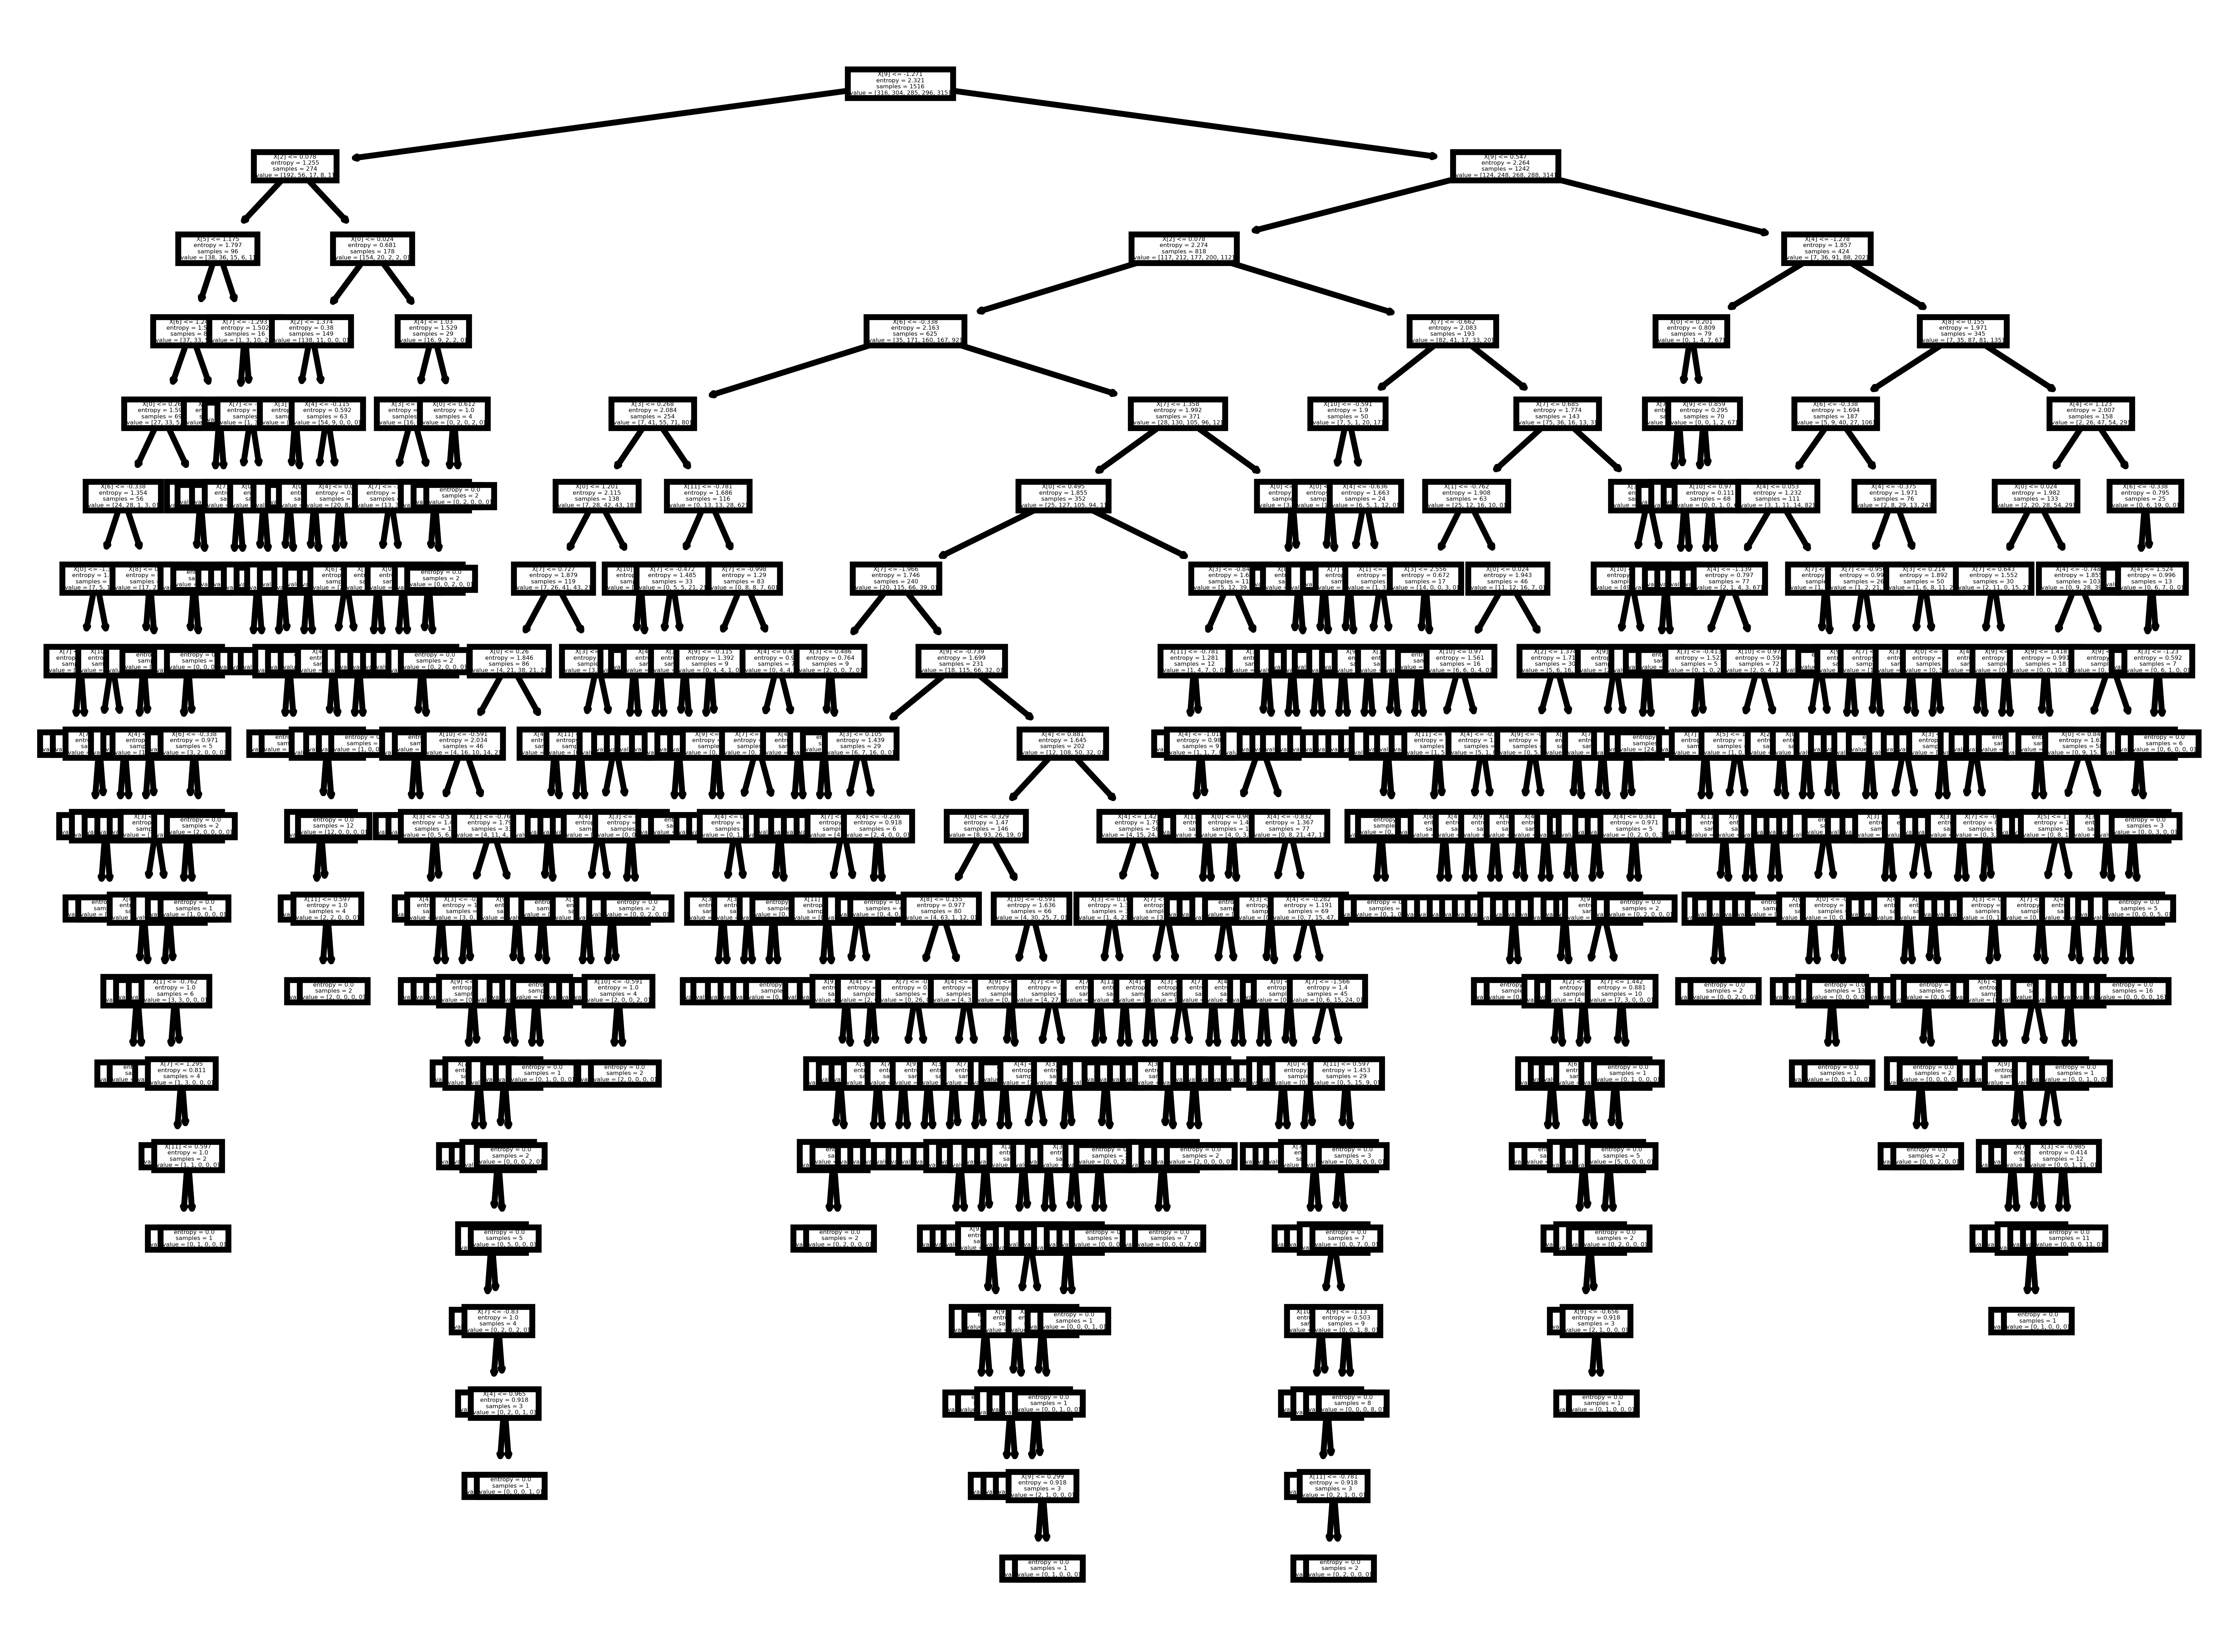

In [151]:
plt.figure(dpi=1200)
from sklearn import tree
tree.plot_tree(model_tree);

    Most important column is at the top and least important column is at the bottom due to information gain/ entropy 

# Deployment with Streamlit:

In [152]:
import pickle  #import pickle library
pickle_out = open("dtree.pkl", "wb") # create the pickle file named as dtree.pkl
pickle.dump(model_tree, pickle_out) # decision tree model saved in var. pickle_out
pickle_out.close()

after execution of above code line, dtree.pkl file will be saved in our local directory. We need to create front end web where by using streamlit library , we can able to access the model and as soon as we give the input, we will able to get the output. Now we can get down to using Streamlit to deploy the model and for that, first install the streamlit lib.

